<a href="https://colab.research.google.com/github/rizkinahayyuni/PCVK_Genap_2022/blob/main/Modul11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MODUL 11 – Metode Deteksi Objek: Template Matching, Edge Detection, Corner Detection, Grid Detection, Contour Detection**

In [1]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


**Soal 1**

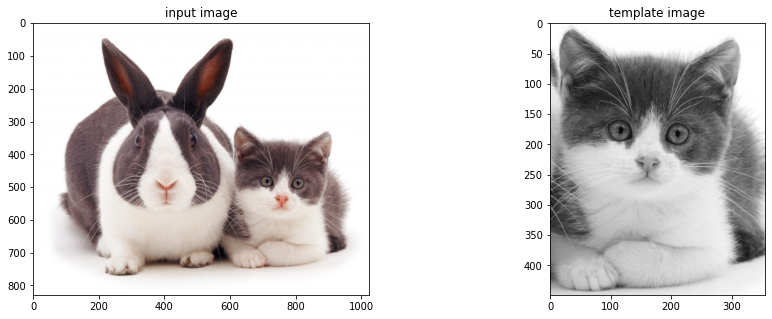

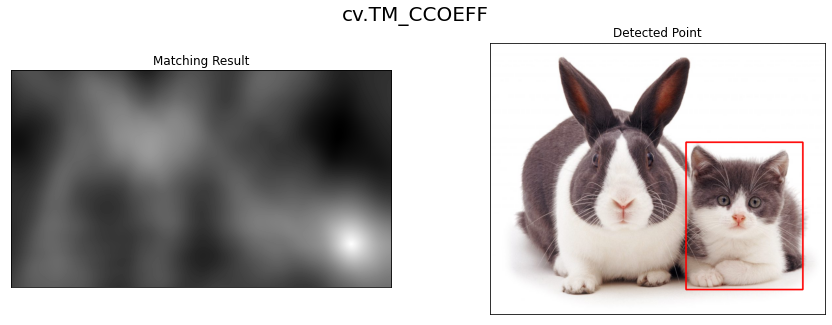

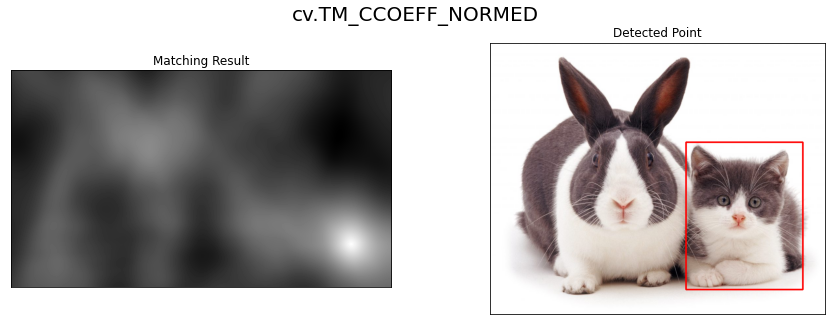

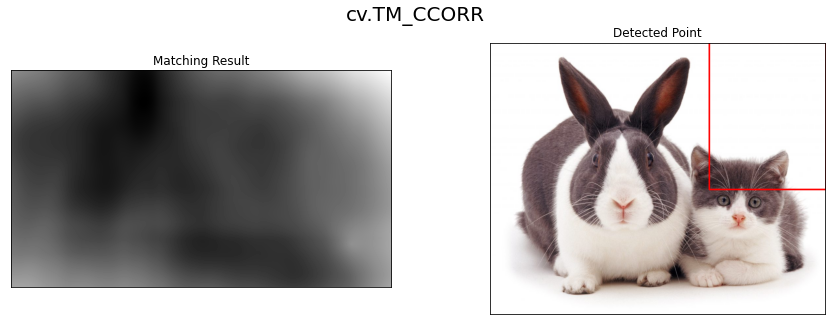

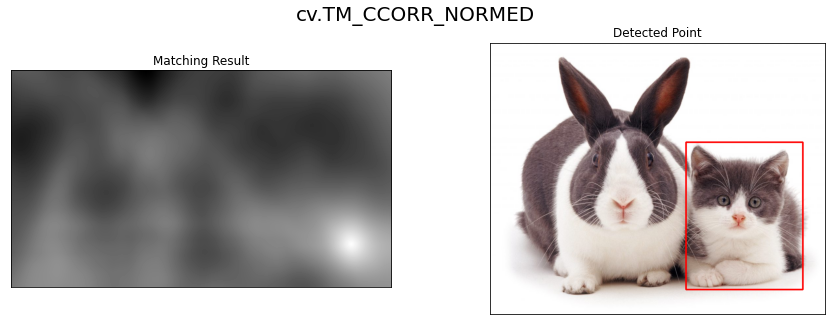

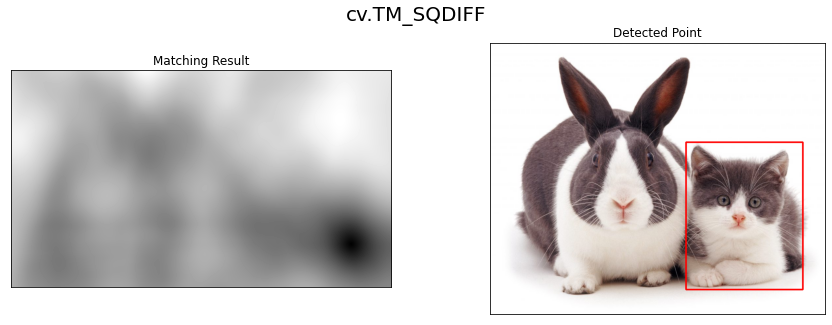

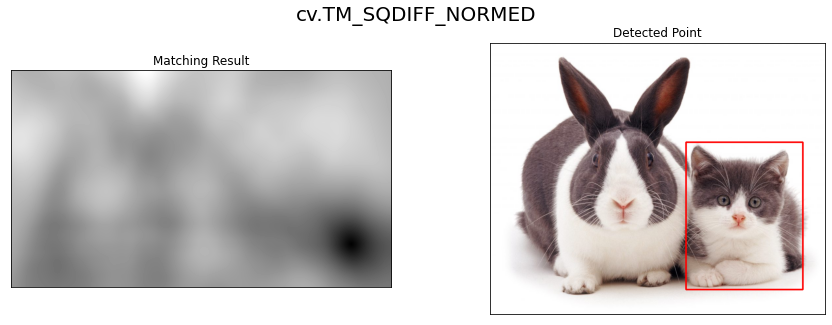

In [7]:
img_input = cv.imread('/content/drive/MyDrive/DATA/js11/cats_and_bunnies.jpg')
img_gray = cv.cvtColor(img_input, cv.COLOR_BGR2GRAY)
img_input2 = img_input.copy()
img_template = cv.imread('/content/drive/MyDrive/DATA/js11/cat2_templatejpg.jpg',0)
w, h = img_template.shape[::-1]

f, axarr = plt. subplots(1,2,figsize=(15,5))
axarr[0].imshow(cv.cvtColor(img_input, cv.COLOR_BGR2RGB)), axarr[0].set_title("input image") 
axarr[1].imshow(cv.cvtColor(img_template, cv.COLOR_BGR2RGB)), axarr[1].set_title("template image")

# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

for meth in methods:
    img = img_input2.copy()
    method = eval(meth)
    
    res = cv.matchTemplate(img_gray,img_template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv.rectangle(img,top_left, bottom_right,(0,0,255),3)
    plt.figure(figsize=(15,5))
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth, fontsize=20)
    plt.show()

**Soal 2**

(<matplotlib.axes._subplots.AxesSubplot at 0x7f97bd793850>,
 <matplotlib.image.AxesImage at 0x7f97bd4e9850>)

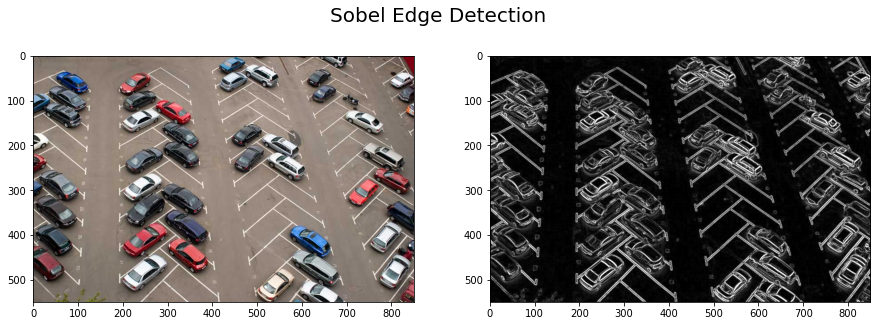

In [11]:
# Sobel Edge Detection
img_plc = cv.imread('/content/drive/MyDrive/DATA/js11/parking-lot-cars.jpg')

img_ori1 = img_plc.copy()
gray = cv.cvtColor(img_ori1, cv.COLOR_BGR2GRAY)

# remove noise with Gaussian Blur
img_gb = cv.GaussianBlur(gray,(3,3),0)

# horizontal dan vertical Sobel
img_sobelx = cv.Sobel(img_gb, cv.CV_64F, 1, 0, ksize=3)
img_sobely = cv.Sobel(img_gb, cv.CV_64F, 0, 1, ksize=3)

# apply sobel
img_sobelxy = cv.addWeighted(cv.convertScaleAbs(img_sobelx), 0.5, cv.convertScaleAbs(img_sobely), 0.5, 0)

f, axarr = plt. subplots(1,2,figsize=(15,5))
plt.suptitle("Sobel Edge Detection", fontsize=20)
plt.subplot(121),plt.imshow(cv.cvtColor(img_ori1, cv.COLOR_BGR2RGB))
plt.subplot(122),plt.imshow(img_sobelxy,cmap = 'gray')

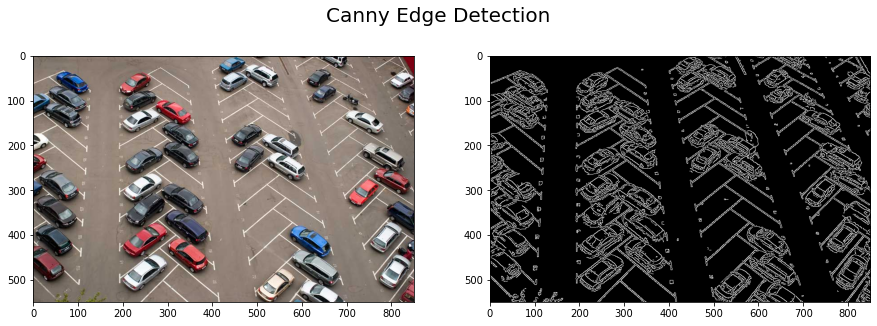

In [12]:
# Canny Edge Detection
img_ori2 = img_plc.copy()

edges = cv.Canny(img_ori2,100,200)

# Add Subplot
f, axarr = plt. subplots(1,2,figsize=(15,5))
plt.suptitle("Canny Edge Detection", fontsize=20)
plt.subplot(121),plt.imshow(cv.cvtColor(img_ori2, cv.COLOR_BGR2RGB))
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.show()

(<matplotlib.axes._subplots.AxesSubplot at 0x7f97bd8af4d0>,
 <matplotlib.image.AxesImage at 0x7f97bd2ccf90>)

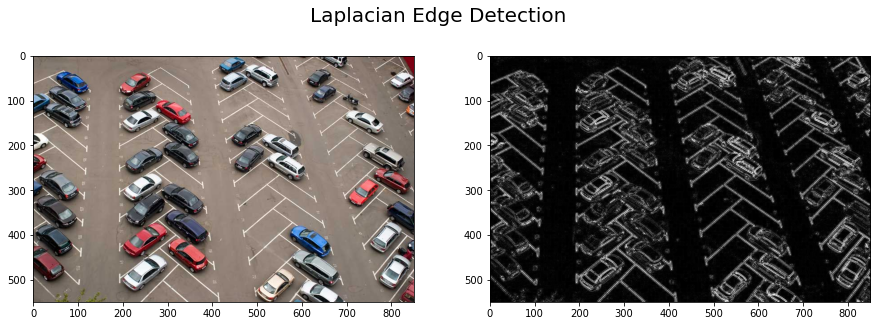

In [15]:
# Laplacian Edge Detection
img_ori3 = img_plc.copy()
img_gray = cv.cvtColor(img_ori3, cv.COLOR_BGR2GRAY)

# Reduce noise in image
img_gb = cv.GaussianBlur(img_gray,(3,3),0)

# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)
filtered_image = cv.Laplacian(img_gb, ksize=3, ddepth=cv.CV_16S)

# converting back to uint8
filtered_image = cv.convertScaleAbs(filtered_image)

# Plot outputs
f, axarr = plt. subplots(1,2,figsize=(15,5))
plt.suptitle("Laplacian Edge Detection", fontsize=20)
plt.subplot(121),plt.imshow(cv.cvtColor(img_ori3, cv.COLOR_BGR2RGB))
plt.subplot(122),plt.imshow(cv.cvtColor(filtered_image, cv.COLOR_BGR2RGB))

**Soal 3**

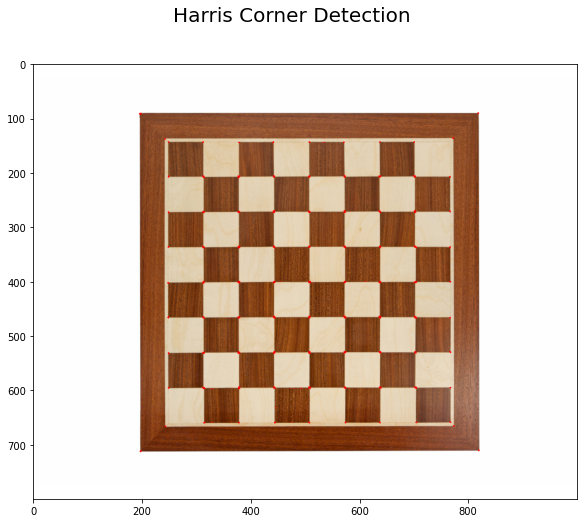

In [17]:
# Harris Corner Detection
img_cb = cv.imread('/content/drive/MyDrive/DATA/js11/chess-board.jpg') 
gray_img = cv.cvtColor(img_cb, cv.COLOR_BGR2GRAY)

img_hcd = cv.cornerHarris(gray_img,3,1,0.04)

gray_img = np.float32(gray_img) 
harris_output = cv.cornerHarris(gray_img,2,3, 3)

#dilasi sudut harris output
harris_output = cv.dilate(harris_output, None)

#Threshold
img_cb[img_hcd>0.01*img_hcd.max()]=[0,0,255]

plt.figure(figsize=(15,8))
plt.suptitle("Harris Corner Detection", fontsize=20)
plt.imshow(cv.cvtColor(img_cb, cv.COLOR_BGR2RGB))

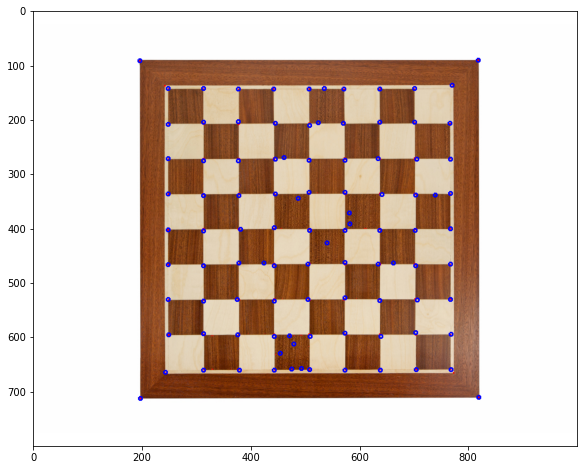

In [18]:
# Shi-thomas corner
img_cb2 = img_cb.copy()
gray_img = cv.cvtColor(img_cb2, cv.COLOR_BGR2GRAY)

# Track corners
corners = cv.goodFeaturesToTrack(gray_img, 100,0.01,10) 
corners = np. int0(corners) 
for i in corners:
    x,y = i.ravel() 
    cv.circle(img_cb2, (x,y),3,255,2)

plt.figure(figsize=(15,8)) 
plt.imshow(cv.cvtColor(img_cb2, cv.COLOR_BGR2RGB))

**Soal 4**

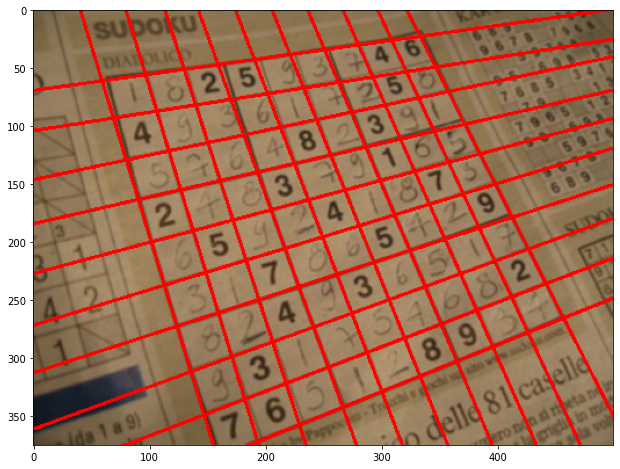

In [20]:
# Hough Transform SUDOKU
img_sudoku = cv.imread('/content/drive/MyDrive/DATA/js11/sudoku.jpg') 
img_gray = cv.cvtColor(img_sudoku, cv.COLOR_BGR2GRAY)

edges = cv.Canny (img_gray, 90, 150, apertureSize = 3)

# dilate process
kernel = np.ones((3,3), np.uint8) 
edges = cv.dilate(edges,kernel,iterations = 1)

#erode process
kernel = np.ones((5,5), np.uint8) 
edges = cv.erode (edges, kernel, iterations = 1)

# implementasi houghlines
lines = cv.HoughLines(edges,1,np.pi/180,150)


if not lines.any():
    print('No lines were found') 
    exit()

if filter:
    rho_threshold = 15 
    theta_threshold = 0.1

 
    similar_lines = {i : [] for i in range(len(lines))} 
    for i in range(len(lines)): 
      for j in range (len (lines)): 
        if i == j: 
            continue

        rho_i, theta_i = lines[i][0] 
        rho_j, theta_j = lines[j][0] 
        if abs(rho_i - rho_j) < rho_threshold and abs (theta_i - theta_j) < theta_threshold:
            similar_lines[i].append(j)


    indices = [i for i in range(len(lines))] 
    indices.sort(key=lambda x: len(similar_lines[x]))

    line_flags = len(lines) *[True] 
    for i in range(len(lines) - 1): 
        if not line_flags [indices[i]]: 
            continue

        for j in range(i + 1, len(lines)): 
            if not line_flags[indices[j]]:
                continue
            rho_i, theta_i = lines[indices[i]][0] 
            rho_j, theta_j = lines[indices[j]][0] 
            if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
                line_flags [indices[j]] = False
    # print('number of Hough lines:', len(lines))
    
    filtered_lines = []

    if filter:
        for i in range(len(lines)): 
            if line_flags[i]:
                filtered_lines.append(lines[i])

            # print('Number of filtered lines:', len(filtered_lines )) 
    else:
        filtered_lines = lines

    for line in filtered_lines:
        rho, theta = line [0] 
        a = np.cos(theta) 
        b = np.sin(theta) 
        x0 = a*rho 
        y0 = b*rho 
        x1 = int(x0 + 1000*(-b)) 
        y1 = int(y0 + 1000*(a)) 
        x2 = int(x0 - 1000*(-b)) 
        y2 = int(y0 - 1000*(a))

        cv.line(img_sudoku, (x1, y1), (x2,y2),(0,0,255),2)

    plt.figure(figsize=(15,8)) 
    plt.imshow(cv.cvtColor(img_sudoku, cv.COLOR_BGR2RGB))

**Soal 5**

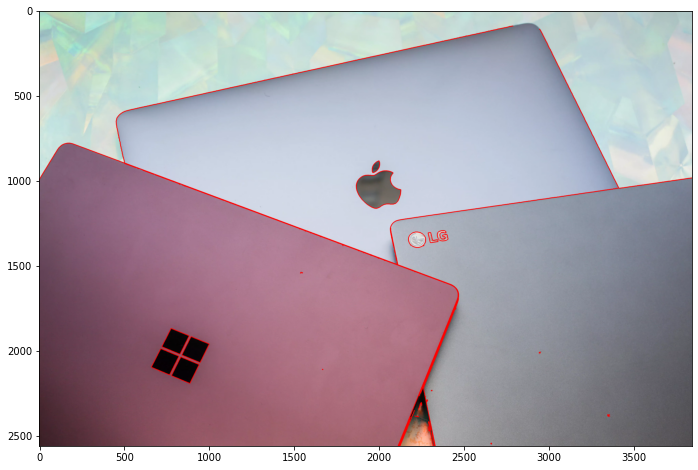

In [22]:
# findCountours
img_laptop = cv.imread('/content/drive/MyDrive/DATA/js11/laptop.jpg') 
img_gray = cv.cvtColor(img_laptop, cv.COLOR_BGR2GRAY)

#Canny process
edged = cv.Canny(img_gray, 30, 200)

#Countours process
contours, hierarchy = cv.findContours(edged, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

cv.drawContours(img_laptop, contours, -1, (0,0,255), 3)

plt.figure(figsize=(15,8)) 
plt.imshow(cv.cvtColor(img_laptop, cv.COLOR_BGR2RGB))